# Customer Churn Prediction - Day 1: Exploratory Data Analysis (EDA)

**Objective:** Understand the structure of the dataset and explore potential relationships between customer attributes and churn behavior.

**Dataset:** IBM Telco Customer Churn (Kaggle)

**Goals:**
- Load and inspect dataset
- Perform univariate and bivariate analysis
- Visualize churn patterns


In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Notebook display options
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


In [2]:
# Load dataset
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Dataset Overview

Let’s examine the shape, column names, data types, and missing values.


In [12]:
print("shape of data",df.shape)  # Rows and columns

print("column info ",df.columns)




shape of data (7043, 21)
column info  Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [9]:
print("Descriptive stats info ",df.describe())

Descriptive stats info         SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [10]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Data Cleaning

We noticed that the `TotalCharges` column is of type object. Let’s convert it to numeric.


In [13]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for NaNs
df['TotalCharges'].isnull().sum()

# Remove rows with NaN in TotalCharges
df = df[df['TotalCharges'].notnull()]


## Target Variable: Churn Distribution

Let’s see the distribution of churned vs non-churned customers.


C:\Users\nitis\AppData\Local\Temp\ipykernel_15392\3397909451.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


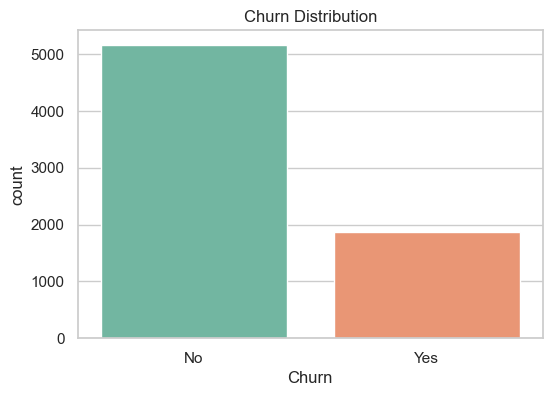

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

In [14]:
# Count plot for churn
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Churn Distribution")
plt.show()

# Churn counts
df['Churn'].value_counts(normalize=True)


## Univariate Analysis

Explore key features like Contract, PaymentMethod, Tenure, MonthlyCharges, etc.


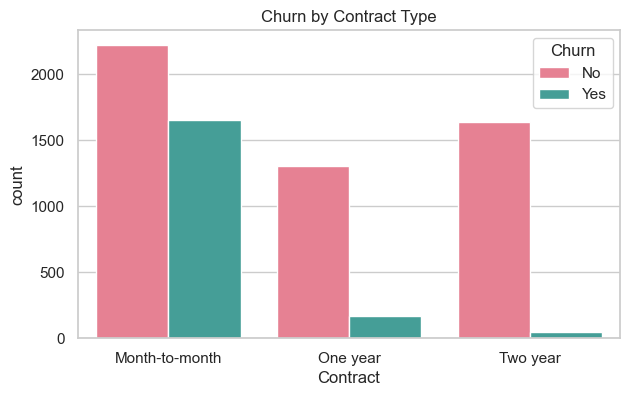

In [15]:
plt.figure(figsize=(7,4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='husl')
plt.title('Churn by Contract Type')
plt.show()


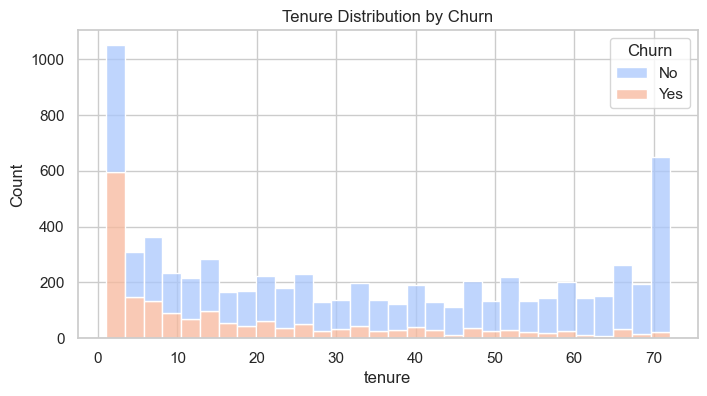

In [16]:
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', palette='coolwarm', bins=30)
plt.title('Tenure Distribution by Churn')
plt.show()


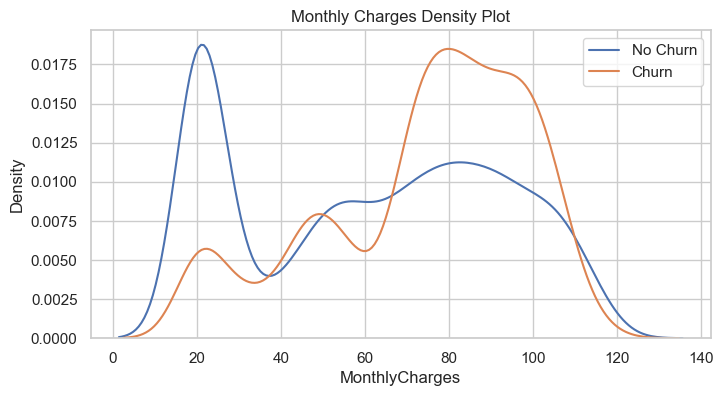

In [17]:
plt.figure(figsize=(8,4))
sns.kdeplot(data=df[df['Churn'] == 'No']['MonthlyCharges'], label='No Churn')
sns.kdeplot(data=df[df['Churn'] == 'Yes']['MonthlyCharges'], label='Churn')
plt.title("Monthly Charges Density Plot")
plt.legend()
plt.show()


## 📌 Initial Observations

- Customers with month-to-month contracts are more likely to churn.
- Short tenure (low loyalty) is correlated with higher churn.
- Higher monthly charges can be associated with churn.
